<a href="https://colab.research.google.com/github/mnmadhan/MachineLearning/blob/ML/INSTAGRAMANALYIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('INSTA_DATA.csv', encoding='latin-1') # Try 'latin-1' encoding
# or
df = pd.read_csv('INSTA_DATA.csv', encoding='cp1252')  # Try 'cp1252' encoding
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [ ]:
print(df.columns)

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')


In [ ]:

df['caption_length'] = df['Caption'].fillna('').apply(len)
df['num_hashtags'] = df['Hashtags'].fillna('').apply(lambda x: len(x.split(',')))

df = df.drop(columns=['Caption', 'Hashtags'])


In [ ]:
features = [
    'caption_length', 'num_hashtags',
    'Impressions', 'From Home', 'From Hashtags',
    'From Explore', 'From Other',
    'Profile Visits', 'Follows'
]

targets = ['Likes', 'Comments', 'Shares', 'Saves']

X = df[features]
y = df[targets]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

for i, col in enumerate(targets):
    print(f"{col} - MSE: {mean_squared_error(y_test[col], y_pred[:, i]):.2f}, R^2: {r2_score(y_test[col], y_pred[:, i]):.2f}")


Likes - MSE: 2456.12, R^2: 0.78
Comments - MSE: 19.18, R^2: -0.00
Shares - MSE: 40.58, R^2: 0.83
Saves - MSE: 11258.35, R^2: 0.80


In [ ]:
new_post = pd.DataFrame([{
    'caption_length': 150,
    'num_hashtags': 5,
    'Impressions': 1200,
    'From Home': 500,
    'From Hashtags': 300,
    'From Explore': 200,
    'From Other': 200,
    'Profile Visits': 80,
    'Follows': 10
}])

predicted = model.predict(new_post)
print("Predicted Engagement (Likes, Comments, Shares, Saves):", predicted[0])


Predicted Engagement (Likes, Comments, Shares, Saves): [  28.16009291    5.30658534   -4.77441449 -111.98438064]


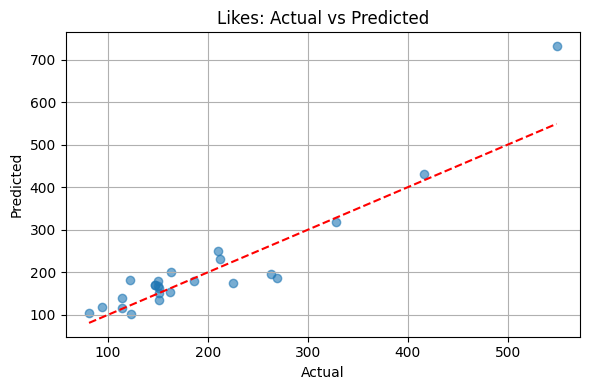

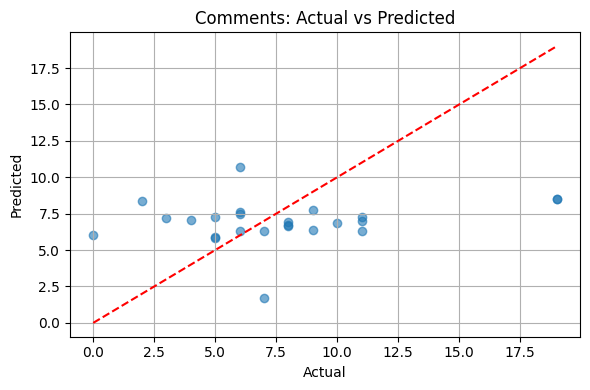

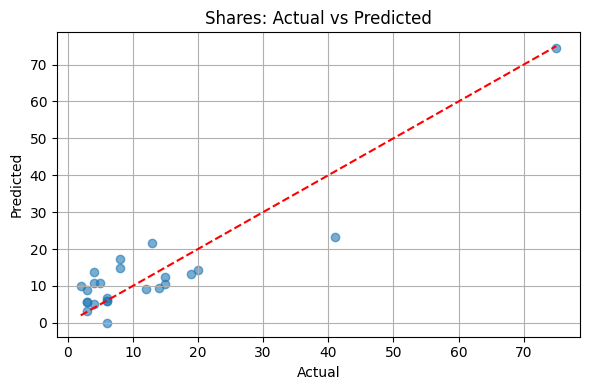

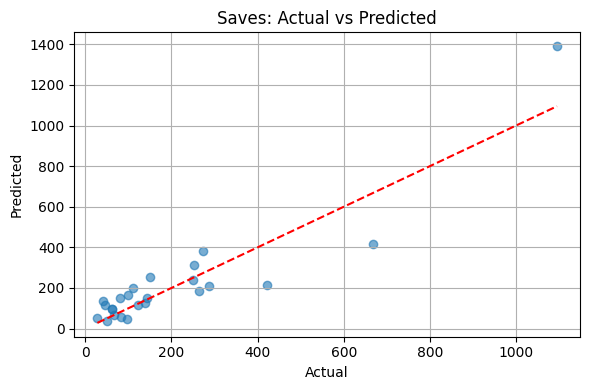

In [ ]:
results = {}
for i, col in enumerate(targets):
    mse = mean_squared_error(y_test[col], y_pred[:, i])
    r2 = r2_score(y_test[col], y_pred[:, i])
    results[col] = {'MSE': mse, 'R2': r2}

    plt.figure(figsize=(6,4))
    plt.scatter(y_test[col], y_pred[:, i], alpha=0.6)
    plt.plot([y_test[col].min(), y_test[col].max()], [y_test[col].min(), y_test[col].max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{col}: Actual vs Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()